<a href="https://colab.research.google.com/github/EmanSalah2000/DBSCAN/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.spatial import distance
import numpy as np
import queue
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
def visualize(data, cluster, numberOfClusters):
    colors = np.array(['blue', 'green', 'brown', 'black', 'purple', 'orange', 'yellow'])
    plt.figure()
    for i in range(-1, numberOfClusters):
        if i == -1:
            color = 'red'
        else:
            color = colors[i % len(colors)]
        x, y = [], []
        for j in range(len(data)):
            if cluster[j] == i:
                x.append(data.iloc[j, 0])
                y.append(data.iloc[j, 1])
        if len(x) > 7:
            plt.scatter(x[0:7], y[0:7], c=color, alpha=1)
        else:
            plt.scatter(x, y, c=color, alpha=1)
    plt.show()

In [ ]:
class DBSCAN_class():
    def __init__(self):
        self.noise = -1
        self.core = -2
        self.border = -3

    def create_distance_matrix(self, data_set):
        distance_matrix = np.zeros((data_set.shape[0], data_set.shape[0]))
        for i in range(data_set.shape[0]):
            for j in range(i):
                distance_matrix[i][j] = distance.euclidean(data_set.iloc[i], data_set.iloc[j])
                distance_matrix[j][i] = distance_matrix[i][j]
        print("Distance Matrix Shape: ", distance_matrix.shape)
        return distance_matrix

    def get_neighbours(self, distance_matrix, epsilon):
        neighbours = []
        for i in range(distance_matrix.shape[0]):
            point_neighbours = []
            for j in range(distance_matrix.shape[1]):
                if distance_matrix[j][i] <= epsilon:
                    point_neighbours.append(j)
            neighbours.append(point_neighbours)
        neighbours = np.array(neighbours)
        return neighbours

    def DBSCAN_algorithm(self, data_set, epsilon, minPts):
        point_label = [-1] * len(data_set)
        core_points = []
        noncore = []
        distance_matrix = self.create_distance_matrix(data_set)
        neighbours_matrix = self.get_neighbours(distance_matrix, epsilon)
        for i in range(len(neighbours_matrix)):
            if len(neighbours_matrix[i]) >= minPts:
                point_label[i] = self.core
                core_points.append(i)
            else:
                noncore.append(i)
        for i in noncore:
            for j in neighbours_matrix[i]:
                if j in core_points:
                    point_label[i] = self.border
                    break
        cluster = 0
        for i in range(len(point_label)):
            q = queue.Queue()
            if point_label[i] == self.core:
                point_label[i] = cluster
                for x in neighbours_matrix[i]:
                    if point_label[x] == self.core:
                        q.put(x)
                        point_label[x] = cluster
                    elif point_label[x] == self.border:
                        point_label[x] = cluster
                while not q.empty():
                    neighbors = neighbours_matrix[q.get()]
                    for y in neighbors:
                        if point_label[y] == self.core:
                            point_label[y] = cluster
                            q.put(y)
                        if point_label[y] == self.border:
                            point_label[y] = cluster
                cluster += 1
        return point_label, cluster

In [ ]:
data_set = pd.read_csv("/content/emails.csv")
data = pd.DataFrame(data_set.iloc[:, 1:data_set.shape[1] - 1])
# data = pd.DataFrame(data.iloc[4700:len(data), :])
# data = pd.DataFrame([(0, 0), (1, 0), (1, 1), (2, 2), (3, 1), (3, 0), (0, 1), (3, 2), (6, 3)])
# print(data.head())
print("Shape of All Data: ", data.shape)

Shape of All Data:  (5172, 3000)


In [ ]:
X = StandardScaler().fit_transform(data)
pca = PCA(n_components=2)
transformed_data = pd.DataFrame(pca.fit_transform(X))
print("Data Shape After PCA: ", transformed_data.shape)

Data Shape After PCA:  (5172, 2)


In [ ]:
DBSCAN_class = DBSCAN_class()
labels, clusters = DBSCAN_class.DBSCAN_algorithm(transformed_data, 3, 5)

Distance Matrix Shape:  (5172, 5172)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


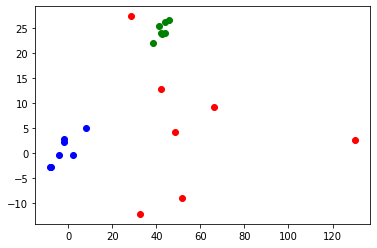

In [ ]:
visualize(transformed_data, labels, clusters)

In [ ]:
print("\nNumber of all clusters: ", clusters)
for c in range(-1, clusters):
    counter = 0
    if c == -1:
        print("\nNoise data are:")
    elif c == 0:
        print("\nNot Spam Emails are:")
    else:
        print("\nSpam Emails are:")
    for key, value in enumerate(labels):
        if value == c:
            # print("Email", key + 1)
            counter = counter + 1
    print("number of points in this cluster: ", counter)


Number of all clusters:  2

Noise data are:
number of points in this cluster:  138

Not Spam Emails are:
number of points in this cluster:  5021

Spam Emails are:
number of points in this cluster:  13


In [ ]:
counter = 0
for i in range(len(labels)):
    if labels[i] == -1:
        counter = counter + 1
print("n noise points: ", counter)

n noise points:  138


In [ ]:
y_actual = list(data_set.iloc[:, -1])
accuracy = sum([1 if y_actual[i] == labels[i] else 0 for i in range(len(labels))]) / len(labels) * 100
print("\naccuracy = ", accuracy, " %")


accuracy =  70.08894044856922  %


n_clusters_: 3


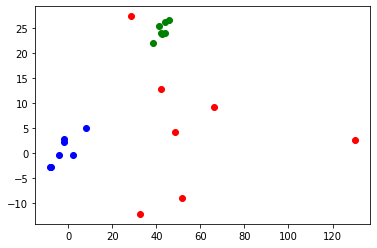


Number of all clusters:  3

Noise data are:
number of points in this cluster:  138

Not Spam Emails are:
number of points in this cluster:  5021

Spam Emails are:
number of points in this cluster:  13

accuracy =  70.08894044856922  %


In [ ]:
# built in DBSCAN
db = DBSCAN(eps=3, min_samples=5).fit(transformed_data)
labels_predict = db.labels_
n_clusters = len(set(labels_predict))
print('n_clusters_:', n_clusters)
visualize(transformed_data, labels_predict, n_clusters)
print("\nNumber of all clusters: ", n_clusters)
for c in range(-1, n_clusters - 1):
    counter = 0
    if c == -1:
        print("\nNoise data are:")
    elif c == 0:
        print("\nNot Spam Emails are:")
    else:
        print("\nSpam Emails are:")
    for key, value in enumerate(labels_predict):
        if value == c:
            # print("Email", key + 1)
            counter = counter + 1
    print("number of points in this cluster: ", counter)
acc = sum([1 if y_actual[i] == labels_predict[i] else 0 for i in range(len(labels_predict))]) / len(labels_predict) * 100
print("\naccuracy = ", acc, " %")